In [1]:
import pandas as pd

df = pd.read_csv('../../Data/SMTO_2015/SMTO_2015_Complete_Input.csv')
df = df[df['Level'] != 'Other']

zones = pd.read_csv('../../Data/Zones.csv').set_index('Zone#')
temp = pd.DataFrame([[a[i] for a in (zones['PD'], zones['X'], zones['Y'])] for i in df['HomeZone']], columns=['PD', 'X', 'Y'], index=df.index)
df = pd.concat((df, temp), axis=1)

df['X'] = (df['X'] - df['X'].min()) / (df['X'].max() - df['X'].min())
df['Y'] = (df['Y'] - df['Y'].min()) / (df['Y'].max() - df['Y'].min())

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

std_dists = df.iloc[:, 17:24]
three_dists = df.iloc[:,18:21] # YK, SC, MI
coords = df[['X', 'Y']]
y = df['School_Codes']
rf = RandomForestClassifier(n_estimators=60, min_samples_split=14, min_samples_leaf=12, max_depth=8)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48342541436464087, 0.44554720542583975, 0.3225455164931908, 0.31290271811452086, 0.2777167854958866, 0.3738276800303014]

MI OC RY SC SG YG YK
131 0 12 0 69 0 51
13 0 20 3 96 0 20
83 0 103 38 415 0 189
2 0 41 120 124 0 45
89 0 106 34 1315 0 198
6 0 5 7 45 6 27
83 0 50 39 334 0 425

75.96693871391496 6.03128240468563 48.61426885762796 4.70710858780256 68.80146223156657 4.616886440263816 54.26205276413862
8.089345897511397 6.314531483527331 32.47414095057228 10.049542323444555 64.99504969888447 2.853879865562755 27.223509780497196
57.60661366024684 27.359677668758064 188.97166672243088 61.41560786484456 301.25746340272224 18.7782814139897 172.61068926700733
6.245538242097716 8.273668872270939 65.1663125846602 97.44137117747492 87.43902998843996 7.924342556679412 59.509736578376874
75.21284362218556 57.721651411866524 291.6550439730047 89.22566033515433 927.3400954925567 30.027460280879136 270.8172448843531
5.754864456700037 2.391591065024583 19.479628783800226 7.879242792211555 30.327

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48388581952117865, 0.44240971340188473, 0.3029264708424883, 0.3032260084477619, 0.26439843465500645, 0.3749786455407592]

MI OC RY SC SG YG YK
126 0 11 2 83 0 81
3 0 9 6 90 0 17
56 0 70 35 492 0 180
3 0 34 94 147 0 27
60 0 65 52 1418 0 166
6 0 8 4 60 9 20
50 0 34 34 407 0 385

87.67612960641496 7.183032038305253 57.85696049156682 6.217699957099703 74.7895788056186 5.2819167351076155 63.994682365887066
5.96598666565216 5.377945057180477 25.75353367645781 8.414417177437649 53.22151851184147 2.311425838924479 23.955173072505957
51.98156893045983 29.99510283353947 191.17040517057376 64.781148783937 300.7850073529623 18.067782005017385 176.2189849235105
4.970697425704682 8.546824263711162 58.64699125413842 84.7553511015213 84.20226596524307 7.20856071905981 56.66930927062153
71.68684942031551 63.17337259324575 291.1728909569384 92.2573700092811 945.3963189450783 28.752265968622204 268.56093210651704
5.390341113439634 3.049618543022542 21.37181083856817 9.046520109696864 36.30517990697753

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48020257826887663, 0.4385347879540974, 0.3172114682892251, 0.31726016660509837, 0.2744936500984247, 0.37719845395622636]

MI OC RY SC SG YG YK
130 0 14 2 87 0 69
6 0 14 5 94 0 19
55 0 94 53 427 0 194
3 0 19 126 153 0 38
57 0 69 53 1309 1 207
7 0 3 9 45 9 26
51 0 40 49 389 0 418

93.1313548792463 6.6510506285738 54.77701166396127 5.469890871043248 79.5121317963779 4.932857031844796 57.52570312895281
7.048888738864228 5.858788197917382 28.21028910660478 8.536128543058167 61.77533459955348 2.5947115319475125 23.975859282054483
52.35485772708298 28.246668986920664 186.72019286693717 57.59381592439944 308.67590777268384 18.236870933511177 171.17168578846457
5.039216382266098 9.520490237144521 65.70839097815214 92.02480534476756 97.12536302815002 8.043355513940242 61.53837851557951
61.27388919627859 60.15759070839866 277.60570950263156 83.06188269220405 924.8407110060891 29.206103194944728 259.85411369945575
5.014672662079216 2.761757480825685 19.01804084871805 8.074850336167854 32.807459

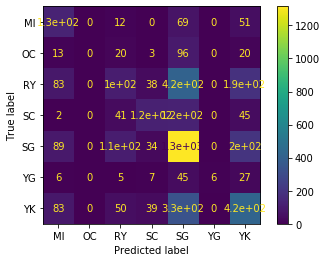

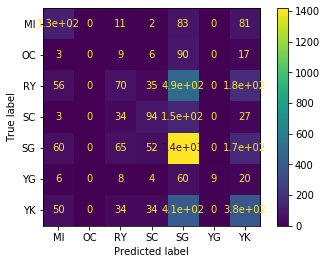

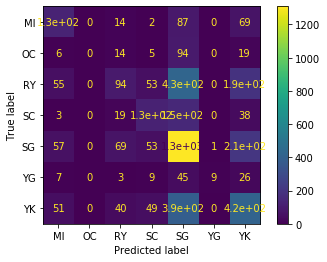

In [3]:
for x in (std_dists, three_dists, coords):
    x = pd.concat((x, df['Family']), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.49056169429097607, 0.43042904339478366, 0.31926120723792034, 0.3056555961123801, 0.27998672680164755, 0.376696093573543]

MI OC RY SC SG YG YK
138 0 10 2 68 0 49
10 0 11 3 89 0 14
85 0 66 49 451 0 152
4 0 10 115 168 0 34
93 0 54 41 1402 1 178
8 0 2 8 53 7 21
93 0 31 38 383 0 403

72.68831024920422 6.259638463214651 52.20255684806919 6.321725419389763 70.41391361506041 5.137893533775976 53.975961871285755
6.675278202568843 5.761626077405881 26.45061744575412 7.8747101176422465 54.919871992354764 2.2834437860668158 23.034452378207355
49.570830107732334 28.59109671660595 179.51257339876776 68.53874295909496 294.5438469981442 17.915532355568352 164.32737746408648
5.658676769815951 9.636499799081577 60.634146544818506 92.11900523086615 94.69209244133401 7.885220952702052 60.37435826138163
69.27863253267228 61.07123156783661 290.0977939418595 89.30805627450323 959.6135573491764 28.74333614686579 270.88739218708525
4.994970647380074 2.886305437210477 18.83902947249768 8.328663703692007 32.

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.47790055248618785, 0.30653178633118117, 0.30097533424624423, 0.2857603578049995, 0.262098386985077, 0.37211923949902437]

MI OC RY SC SG YG YK
125 0 7 0 76 0 62
11 0 14 4 106 0 20
70 0 78 33 466 0 184
3 0 28 103 148 0 32
79 0 61 34 1359 0 205
7 0 1 6 67 0 21
66 0 31 32 394 0 411

77.6162241428945 5.503512047826204 51.65206950321087 4.85079117784496 70.9553786145482 4.6527494010074815 54.76927511266774
8.546205879094286 5.859839613484966 31.23610354223236 10.73427449008086 66.19102646135381 3.208889666910054 29.223660346843666
51.99475236352011 27.594630157028096 188.58299811242927 62.349776914188 307.8823376439643 18.85244440452062 173.74306040434936
5.8561137513070465 7.797730619680225 60.41995763809533 87.18943378640907 87.94547471550031 8.057901033462024 56.733388455545956
72.00269680548705 56.859237856545136 285.4978664928247 88.6910402487299 935.6639277556584 30.289272759072457 268.99595808168436
5.664246750652517 2.578170898749893 20.752944008757066 8.283879782656893 36.133817

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48342541436464087, 0.3942833485590644, 0.31756077557330814, 0.3098687740186535, 0.2703741472550178, 0.3767159306320486]

MI OC RY SC SG YG YK
124 0 6 1 79 0 60
5 0 15 4 77 0 22
74 0 85 45 445 0 207
1 0 32 108 126 0 39
88 0 74 45 1344 4 223
8 0 5 5 37 8 30
60 0 29 42 356 0 431

81.21436071499726 7.3083332819088875 49.0124293151769 5.538429078309666 68.80031152057634 4.969315453138947 53.15682063589192
5.340991378791693 5.1517337048741005 26.77313965768879 7.068971140459367 53.6983914870175 2.425698617781847 22.541074013386694
55.316166735868016 31.590639287978604 191.98488449569905 62.65042582887819 310.7976453617108 18.632054552844668 185.02818373702047
3.7158548578399615 8.886368059455775 59.330517758920436 85.92845952224404 87.08536566845963 6.88832147401553 54.165112659064675
73.11952257776093 64.76213759507276 288.7758835752195 88.45023952858783 951.5611127286975 31.95152362239804 279.37958037226394
5.018838175332938 2.578709122084402 17.1663802768094 8.610510282271433 27.466433

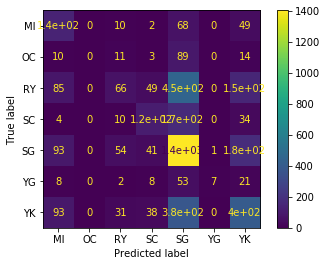

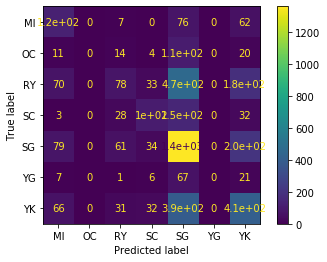

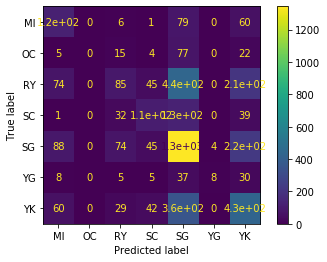

In [4]:
for x in (std_dists, three_dists, coords):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.4822744014732965, 0.42963809671000136, 0.3230238061073165, 0.31350248870856107, 0.2727493619860633, 0.3744502855039088]

MI OC RY SC SG YG YK
168 0 9 3 73 0 53
9 0 14 2 92 0 22
83 0 82 39 418 0 171
2 0 29 110 139 0 39
90 0 71 55 1331 1 216
11 0 5 4 44 8 27
86 0 31 39 372 0 396

85.95093473232151 7.859180065749179 57.97327713764024 6.968648528128751 81.44189534546086 4.875268744705622 60.93079544599378
5.967307845377841 5.407881983566416 29.574235801125454 9.052514227995795 59.60836058375398 2.4551559778256866 26.934543580354816
51.00855257058121 27.25713066262752 182.64257744329277 62.76245747474528 286.8709695239135 17.4868731471303 164.9714391777092
4.920548396502655 8.186941704984383 60.638784674869456 92.5517611727415 86.98812375449349 7.698356573822191 58.01548372258637
67.43612952160298 59.14417123293749 293.0475548663855 93.28562968929647 952.7345644745155 29.33541732242683 269.01653289283394
6.708943018557154 2.7174380895881836 20.51113917478861 7.85029227315851 29.984163832

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.48457642725598526, 0.43556791163097713, 0.3139313114318248, 0.3030731903988473, 0.2642392129668703, 0.37421377780994786]

MI OC RY SC SG YG YK
132 0 4 2 75 0 55
7 0 10 1 111 0 18
71 0 61 52 442 0 178
2 0 19 105 139 0 45
85 0 58 60 1413 0 194
8 0 3 3 48 8 22
81 0 29 37 380 0 386

77.29098976397134 6.566117153233253 52.73320861383155 5.321848825142551 67.47368049698896 4.883169411720819 53.73098573511143
6.8730861862100525 5.7933543293457435 30.200814904557593 8.78003808576414 65.50458494019826 2.880282849108613 26.967838704815595
51.62128892339667 27.743043693942507 183.6344567887959 58.67141974849301 294.5545245730498 18.04918341224899 169.72608286007355
5.768563941300132 8.901553619640696 61.44286991373354 79.00870229323642 87.95194614533959 8.243902593000604 58.682461493749095
74.28260060018398 60.48259032326408 300.86948862666713 94.24258790969925 968.4540250504966 32.29700873543598 279.37169875425104
5.392911642783848 2.635905540600773 18.51484642429791 6.954441437254302 30.3560

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.47882136279926335, 0.44134341671842786, 0.3024835444262863, 0.2958854784374219, 0.2588296638443433, 0.3742195108689002]

MI OC RY SC SG YG YK
116 0 13 1 78 0 67
12 0 8 4 101 0 18
53 0 86 56 444 0 170
1 0 24 119 151 0 33
66 0 87 52 1363 0 199
4 0 6 4 53 3 21
51 0 46 44 397 0 393

81.85748099127198 5.9664061953485525 53.207882512890336 4.7724459616326795 70.80766294169464 4.611670489888688 53.77645090727315
8.661623132548442 5.421100116257512 28.748494625144875 9.10654381055777 61.00150767137448 2.7699249943217463 27.290805649795164
47.35330193308965 27.9924097785955 183.81381478113536 61.96494122114508 298.0009041579303 18.24929857087497 171.62532955722855
4.622324823434075 9.048576659706521 63.595196769094365 88.58302130995399 93.39380299344292 7.95082291894333 60.80625452542484
75.15034595565999 58.84148907827171 299.681639024644 85.64912133568767 947.3610363684877 29.370727761868668 270.9456404753817
4.144827685951594 2.393653372799111 18.031002157111583 7.30189780604177 31.655207

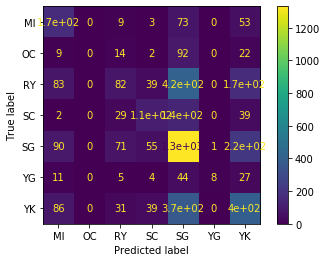

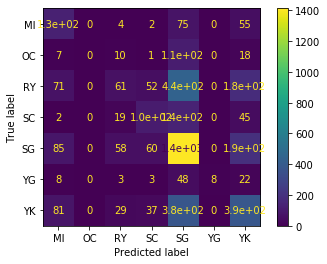

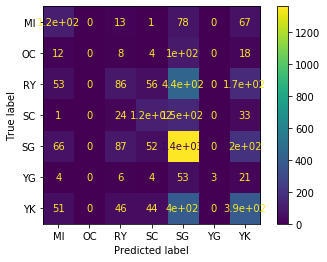

In [5]:
for x in (std_dists, three_dists, coords):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)    
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    probs = pd.concat((y_test.reset_index(drop=True), pd.DataFrame(rf.predict_proba(X_test))), axis=1)
    schools = list(rf.classes_)
    
    metrics_list = [rf.score(X_test, y_test)]      
    metrics_list.extend(precision_recall_fscore_support(y_test, preds, average = 'macro')[:3])
    metrics_list.append(matthews_corrcoef(y_test, preds))
    metrics_list.append(probs.apply(lambda z: z[schools.index(z.School_Codes)], axis=1).mean())
    print(metrics_list)
    
    print()
    cm = plot_confusion_matrix(rf, X_test, y_test).confusion_matrix
    print(*schools)
    for lst in cm:
        print(*lst)
    
    print()
    for school in schools:
        print(*probs[probs['School_Codes'] == school][list(range(7))].sum().values)